# PR Assignment 3

## Garima Jain
## 18MCMI14
## M.Tech AI

## Q1. Apply K-means clustering on the following two datasets.

### Write your own code for K-means clustering.

### IRIS dataset (omit the class labels and perform clustering).

### One dataset of your choice from the UCI Machine Learning Repository

In [306]:
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [307]:
'''
Pseudo code

1.select 'k' value(#clusters)
2.initialisation : randomly choose k cluster centroids
3.find Euclidean distance of each pt from each of k centroids
4.assign a cluster(nearest centroid) to each of the points
5.find new centroids
6.repeat until clusters don't change or set number iterations have passed
'''

def k_means_clustering(X, k, max_iters):
    total_samples = X.shape[0] 
    # will assign 0, 1, 2,...k-1 values to each data pt representing to which 
    #cluster it belongs to 
    
    prev_clusters = np.array([])
    curr_clusters = np.zeros((total_samples))
    centroids = X[ np.random.choice(X.shape[0], size=k, replace=False)] #2.
    curr_iters = max_iters
    while True :
        prev_clusters = curr_clusters.copy()
        for i in range(total_samples):
            curr_clusters[i] = np.argmin(np.linalg.norm(X[i] - centroids, axis=1))
        #5.
        for i in range(k):
            data = X[prev_clusters==i]
            if data.size:
                centroids[i] = np.mean(data)
        curr_iters -= 1 
        
        if not np.array_equal(prev_clusters,curr_clusters) and curr_iters != 0 :
            continue
        else :
            break
    cluster_pts = np.array([X[prev_clusters == i] for i in range(k)])
    
    print("Number of clusters: " + str(k))
    print("Clusters stabilise in " + str(max_iters-curr_iters) + " iterations.")
    print("Final " + str(k) + " centroids")
    print(centroids)
    
    return cluster_pts, centroids, curr_clusters

K-means clustering on Iris dataset

In [308]:
iris_data = load_iris()['data']

In [309]:
k=3
max_iters = 50

# _std = StandardScaler().fit_transform(iris_data)
# pca = PCA(n_components=3)
# pca.fit(_std)
# iris_data = pca.transform(_std)

iris_cluster_pts, iris_centroids, iris_clusters = k_means_clustering(X=iris_data, k=k, max_iters=max_iters)

Number of clusters: 3
Clusters stabilise in 20 iterations.
Final 3 centroids
[[2.5625     2.5625     2.5625     2.5625    ]
 [3.66637931 3.66637931 3.66637931 3.66637931]
 [4.43815789 4.43815789 4.43815789 4.43815789]]


Plot clusters

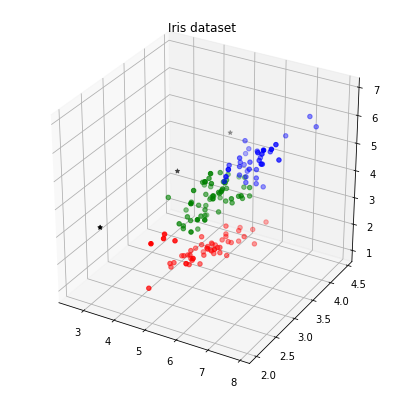

In [310]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_cluster_pts[0][:, 0], iris_cluster_pts[0][:, 1], iris_cluster_pts[0][:, 2], c='r')
ax.scatter(iris_cluster_pts[1][:, 0], iris_cluster_pts[1][:, 1], iris_cluster_pts[1][:, 2], c='g')
ax.scatter(iris_cluster_pts[2][:, 0], iris_cluster_pts[2][:, 1], iris_cluster_pts[2][:, 2], c='b')
ax.scatter(iris_centroids[:, 0], iris_centroids[:, 1], iris_centroids[:, 2], c='k', marker='*')

plt.title('Iris dataset')
plt.show()

K means clustering on breast cancer wisconsin dataset

In [311]:
breast_cancer_data = load_breast_cancer()['data']

In [312]:
_std = StandardScaler().fit_transform(breast_cancer_data)
pca = PCA(n_components=3)
pca.fit(_std)
breast_cancer_data = pca.transform(_std)

max_iters = 50
k=2
cancer_cluster_pts, cancer_centroids, cancer_clusters = k_means_clustering(X=breast_cancer_data, k=k, max_iters=max_iters)

Number of clusters: 2
Clusters stabilise in 50 iterations.
Final 2 centroids
[[ 1.84279211  1.84279211  1.84279211]
 [-0.81849903 -0.81849903 -0.81849903]]


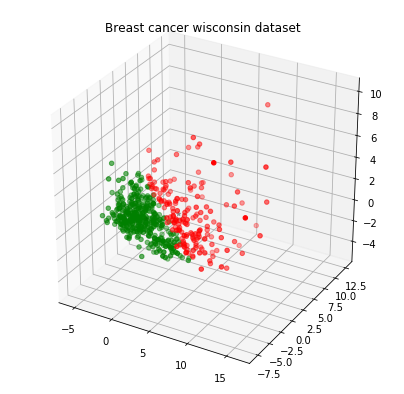

In [313]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cancer_cluster_pts[0][:, 0], cancer_cluster_pts[0][:, 1], cancer_cluster_pts[0][:, 2], c='r')
ax.scatter(cancer_cluster_pts[1][:, 0], cancer_cluster_pts[1][:, 1], cancer_cluster_pts[1][:, 2], c='g')
ax.scatter(cancer_centroids[:, 0], cancer_centroids[:, 1], c='k', marker='*')

plt.title('Breast cancer wisconsin dataset')
plt.show()

## Q2. There are two kinds of Cluster validation measures – Internal Measures and External Measures. Describe any two cluster validation measures of each kind. Apply these measures on your datasets as well as compute the Confusion Matrix. Present an analysis and discussion of your results. 

### Internal Cluster Validation Measures

#### RMSSTD:
- The root mean square standard deviation is  an  evaluation  method  used  to  measure  the quality of the clustering algorithm. The lower the value of RMSSTD, the better the separation of clusters.
- RMSSTD is a measure of homogeneity within clusters


  RMSSTD = $\sqrt{\frac{\displaystyle\sum_{\substack{
   j=1..p \\
   i=1..k
  }}\displaystyle\sum_{a=1}^{n_{ij}} (x_a - \bar{x_{ij}})^2}{\displaystyle\sum_{\substack{
   j=1..p \\
   i=1..k
  }}(n_{ij} -1 )}}$
  
where $k$ is the number of clusters,

$p$ is  the  number  of  independent  variables in dataset,

$x_{ij} $ is  the  mean  of  values  of feature  j and cluster i, 

and $n_{ij}$ is  the  number  of  data  points  which  are  in feature j and cluster i.

#### R- Square:


- The R-squared value is used to determine whether  there  is  a  significant  difference  among objects in different groups and that objects in the same group have high similarity.  If  RS  equals  zero,  then  there  is  no difference between the groups. 
- On the other hand, if RS equals one, then the partitioning of clusters is optimal

$RS = \frac{SS_t - SS_w}{SS_t}$

where $SS_t = \displaystyle\sum_{j=1}^{p} \displaystyle\sum_{a=1}^{n_{ij}} (x_a - \bar{x_{j}})^2 $

and $SS_w = \displaystyle\sum_{\substack{
   j=1..p \\
   i=1..k
  }} \displaystyle\sum_{a=1}^{n_{ij}} (x_a - \bar{x_{ij}})^2 $


where $SS_t$ is  the  summation  of  the  distance squared among all variables,

$SS_w$ is  the  summation  of  the  distance squared among all data in the same cluster, 

$k$ is the number of clusters,

$p$ is the number of features in the dataset,

$x_j$ is the mean of values of feature j,

and $n_{ij}$ is  the  number  of  data  points in feature j and cluster i.

In [318]:
def rmsstd(cluster_pts, k):
    sum_vec =[0]*k
    for i in range(k):
        sum_vec.append(np.sum((cluster_pts[i] - np.mean(cluster_pts[i], axis=0)) ** 2))
    sum = np.sum(sum_vec)
    divider = 0
    for i in range(k):
            divider += cluster_pts[i].shape[1] * ( cluster_pts[i].shape[0] - 1 )
    return sum, np.sqrt(sum / divider)

In [319]:
def rs(cluster_pts, k, ssw):
    # squared deviations of data points from mean vector of features
    mean_vec = np.mean([np.mean(cluster_pts[i], axis=0) for i in range(k)], axis=0)
    sum = []
    for i in range(k):
        sum.append(np.sum((cluster_pts[i] - mean_vec) ** 2 ))
    sst = np.sum(sum)
        
    return ( sst - ssw ) / sst


In [316]:
k = 3
ssw, rmsstd = rmsstd(iris_cluster_pts, k)
print("RMSSTD value for Iris dataset: ", rmsstd)
print("R-Square value for Iris dataset: ", rs(iris_cluster_pts, k, ssw))

RMSSTD value for Iris dataset:  0.3865058121596391
R-Square value for Iris dataset:  0.8724080214292516


RMSSTD value is 0.855 means clusters are not well separated.

Also, R-square value is low, so it's not optimal clustering.

In [320]:
k = 2
ssw, rmsstd = rmsstd(cancer_cluster_pts, k)
print("RMSSTD value for Breast cancer wisconsin dataset: ", rmsstd)
print("R-Square value for Breast cancer wisconsin dataset: ", rs(cancer_cluster_pts, k, ssw))

RMSSTD value for Breast cancer wisconsin dataset:  2.230936460073682
R-Square value for Breast cancer wisconsin dataset:  0.3528986427294973


RMSSTD value is 2.23 means clusters are not well separated.

Also, R-square value is low, so it's not optimal clustering.

### External Cluster Validation Measures 

#### Purity:
Purity is a simple and transparent evaluation measure. Normalized mutual information can be information-theoretically interpreted. The Rand index penalizes both false positive and false negative decisions during clustering. The F measure in addition supports differential weighting of these two types of errors. 

To compute purity , each cluster is assigned to the class which is most frequent in the cluster, and then the accuracy of this assignment is measured by counting the number of correctly assigned documents and dividing by $N$. Formally: 

$\mbox{purity}( \Omega,\mathbb{C} ) = \frac{1}{N} \sum_k \max_j \vert\omega_k \cap c_j\vert $

#### F-measure
F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 

$F1 = 2.(\frac {precision . recall}{precision + recall})$

In [321]:
def confusion_matrix(k, labels):
        cm = np.zeros((k, k), int)
        number_of_datapoints = np.sum([labels[i].size for i in range(k)])
        for i in range(k):
            counts = np.bincount(labels[i])
            target = np.argmax(counts)
            for label in labels[i]:
                cm[label, int(target)] += 1
        return cm

def precision(TP, FP):
    return np.around((TP/(TP+FP)),decimals=3)

def recall(TP, FN):
    return np.around((TP/(TP+FN)),decimals=3)


def f_measure(TP, FP, FN):
    precision_val = precision(TP, FP)
    recall_val = recall(TP, FN)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

def cm_metrics(cm):
    FP, FN, TN = [], [], []
    for i in range(cm.shape[0]):
        FP.append(sum(cm[:,i]) - cm[i,i])
        FN.append(sum(cm[i,:]) - cm[i,i])
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))
    return np.diag(cm),FP, FN, TN

def purity(clusters, y):
    samples = clusters.shape[0] * clusters.shape[1]
    sum = 0
    for i in range(k):
        counts = np.bincount(clusters[i])
        max_occurances = max(counts)
        sum += max_occurances
    return sum / samples    

In [322]:
iris_label = np.array( load_iris()['target'] ).reshape(3,50)
iris_clusters = iris_clusters.reshape(3,50).astype(int)
k = 3

cm = confusion_matrix(k, iris_clusters)
print("Confusion Matrix: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(iris_clusters, iris_label) )
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))

Confusion Matrix: 
[[50  4  0]
 [ 0 43 15]
 [ 0  3 35]]
Purity:  0.8533333333333334
F-Measure:  [0.9615784  0.79607745 0.79543492]
Average F-Measure:  0.8510302563805222


In [323]:
cancer_label = np.array( load_breast_cancer()['target'] )
# print(cancer_label)

## Q3. Use Kernel K-means from any python package (for example, scikit-learn) on the dataset you chose in (1)(c) and compare both the results.

In [324]:
from sklearn.cluster import SpectralClustering

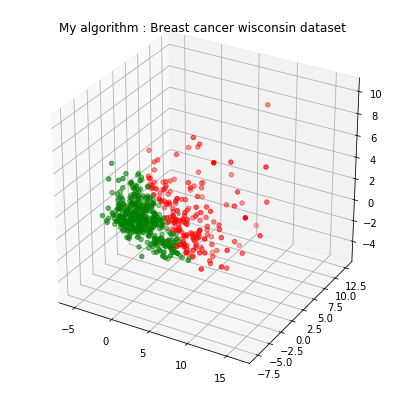

In [325]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cancer_cluster_pts[0][:, 0], cancer_cluster_pts[0][:, 1], cancer_cluster_pts[0][:, 2], c='r')
ax.scatter(cancer_cluster_pts[1][:, 0], cancer_cluster_pts[1][:, 1], cancer_cluster_pts[1][:, 2], c='g')
ax.scatter(cancer_centroids[:, 0], cancer_centroids[:, 1], c='k', marker='*')

plt.title('My algorithm : Breast cancer wisconsin dataset')
plt.show()

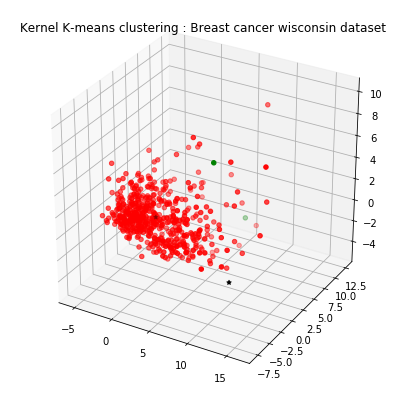

In [326]:
k = 2
clustering = SpectralClustering(
            n_clusters=2,  
            n_init=1000,
            gamma=0.5, 
            assign_labels='kmeans', 
            degree=3, 
            coef0=1, 
            kernel_params=None, 
            n_jobs=1).fit_predict(breast_cancer_data)
clusters = np.array([breast_cancer_data[clustering == i] for i in range(k)])
centroids = np.array([np.mean(clusters[i],axis=0) for i in range(k)])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters[0][:, 0], clusters[0][:, 1], clusters[0][:, 2], c='r')
ax.scatter(clusters[1][:, 0], clusters[1][:, 1], clusters[1][:, 2], c='g')
ax.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='*')

plt.title('Kernel K-means clustering : Breast cancer wisconsin dataset')
plt.show()

Spectral K-means clustering with rbf kernel is giving wrong results due to some reason, cannot figure out.
It is only assigning 2 data points to one of the clusters and rest are in 1 cluster.

Applying scikit's K-means clustering algorithm implementation

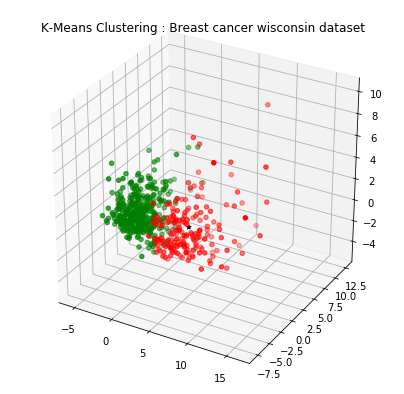

In [327]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')\
        .fit_predict(breast_cancer_data)

clusters = np.array([breast_cancer_data[clustering == i] for i in range(k)])
centroids = np.array([np.mean(clusters[i],axis=0) for i in range(k)])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters[0][:, 0], clusters[0][:, 1], clusters[0][:, 2], c='r')
ax.scatter(clusters[1][:, 0], clusters[1][:, 1], clusters[1][:, 2], c='g')
ax.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='*')

plt.title('K-Means Clustering : Breast cancer wisconsin dataset')
plt.show()

Applying scikit's Agglomerative clustering algo implementation

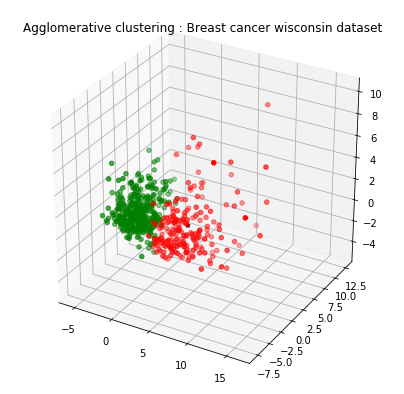

In [328]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(breast_cancer_data)
clusters = np.array([breast_cancer_data[clustering == i] for i in range(k)])
centroids = np.array([np.mean(clusters[i],axis=0) for i in range(k)])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters[0][:, 0], clusters[0][:, 1], clusters[0][:, 2], c='r')
ax.scatter(clusters[1][:, 0], clusters[1][:, 1], clusters[1][:, 2], c='g')
ax.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='*')

plt.title('Agglomerative clustering : Breast cancer wisconsin dataset')
plt.show()
